#**Responsi 2 Praktikum Natural Language Processing**

#**Nama : Gavrilla Claudia**

#**NIM : 21110004**

#**Kelas : S1SD02A**

In [159]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from string import punctuation
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [160]:
faq =pd.read_csv('/content/dataset_mentalhealth.csv')
faq

,Question_ID,Questions,Jawaban
0,1590140,Apa yang dimaksud dengan penyakit mental?,Penyakit mental adalah kondisi kesehatan yang ...
1,2110618,Siapa yang terpengaruh oleh penyakit mental?,Diperkirakan bahwa penyakit mental mempengaruh...
2,6361820,Apa penyebab penyakit mental?,Diperkirakan bahwa penyakit mental mempengaruh...
3,9434130,Apa sajakah tanda-tanda peringatan penyakit me...,Gejala gangguan kesehatan mental bervariasi te...
4,7657263,Apakah penderita penyakit jiwa bisa sembuh?,"Ketika penyembuhan dari penyakit mental, ident..."
...,...,...,...
93,4373204,Bagaimana saya tahu kalau saya minum terlalu b...,Menyortir jika Anda minum terlalu banyak bisa ...
94,7807643,"Jika ganja berbahaya, mengapa kita melegalkannya?","Asap ganja, misalnya, mengandung racun penyeba..."
95,4352464,Bagaimana cara meyakinkan anak saya untuk tida...,Anda tidak bisa. Tetapi Anda dapat mempengaruh...
96,6521784,Apa status hukum (dan bukti) minyak CBD?,Cannabidiol atau CBD adalah komponen ganja yan...


In [161]:
faq_quest = faq[['Question_ID', 'Questions']]
faq_answ = faq[['Question_ID', 'Jawaban']]

#**Text Pre-processing**

In [162]:
def to_lower(text):
    return text.lower()

In [163]:
def remove_number(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [164]:
def remove_punct(text):
    return "".join(c for c in text if c not in punctuation)

In [165]:
def to_strip(text):
    return " ".join([c for c in text.split() if len(c)>2])

In [166]:
def remove_char(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    return text

In [167]:
def remove_duplicate(text):
    text = re.sub("(.)\\1{2,}", "\\1", text)
    return text

In [168]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [169]:
import nltk
from nltk.corpus import stopwords
stopwords.words('indonesian')

def remove_stopwords(text):
    stop_words= stopwords.words('indonesian')

    return ' '.join(c for c in nltk.word_tokenize(text) if c not in stop_words)

In [170]:
from nltk.stem import WordNetLemmatizer

wordnet_lemma = WordNetLemmatizer()

def lemma(text):
    lemmatize_words = [wordnet_lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return ' '.join(lemmatize_words)

In [171]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
faq['JawabanEncode'] = label.fit_transform(faq['Jawaban'])
faq

,Question_ID,Questions,Jawaban,JawabanEncode
0,1590140,Apa yang dimaksud dengan penyakit mental?,Penyakit mental adalah kondisi kesehatan yang ...,72
1,2110618,Siapa yang terpengaruh oleh penyakit mental?,Diperkirakan bahwa penyakit mental mempengaruh...,23
2,6361820,Apa penyebab penyakit mental?,Diperkirakan bahwa penyakit mental mempengaruh...,24
3,9434130,Apa sajakah tanda-tanda peringatan penyakit me...,Gejala gangguan kesehatan mental bervariasi te...,33
4,7657263,Apakah penderita penyakit jiwa bisa sembuh?,"Ketika penyembuhan dari penyakit mental, ident...",50
...,...,...,...,...
93,4373204,Bagaimana saya tahu kalau saya minum terlalu b...,Menyortir jika Anda minum terlalu banyak bisa ...,61
94,7807643,"Jika ganja berbahaya, mengapa kita melegalkannya?","Asap ganja, misalnya, mengandung racun penyeba...",9
95,4352464,Bagaimana cara meyakinkan anak saya untuk tida...,Anda tidak bisa. Tetapi Anda dapat mempengaruh...,7
96,6521784,Apa status hukum (dan bukti) minyak CBD?,Cannabidiol atau CBD adalah komponen ganja yan...,20


In [172]:
faq_quest['prep1']= faq_quest['Questions'].apply(to_lower)
faq_quest['prep2']= faq_quest['prep1'].apply(remove_number)
faq_quest['prep3']= faq_quest['prep2'].apply(remove_punct)
faq_quest['prep4']= faq_quest['prep3'].apply(to_strip)
faq_quest['prep5']= faq_quest['prep4'].apply(remove_char)
faq_quest['prep6']= faq_quest['prep5'].apply(remove_duplicate)
faq_quest['prep7']= faq_quest['prep6'].apply(remove_stopwords)
faq_quest['lemma']= faq_quest['prep7'].apply(lemma)
faq_quest.head(10)

,Question_ID,Questions,prep1,prep2,prep3,prep4,prep5,prep6,prep7,lemma
0,1590140,Apa yang dimaksud dengan penyakit mental?,apa yang dimaksud dengan penyakit mental?,apa yang dimaksud dengan penyakit mental?,apa yang dimaksud dengan penyakit mental,apa yang dimaksud dengan penyakit mental,apa yang dimaksud dengan penyakit mental,apa yang dimaksud dengan penyakit mental,penyakit mental,penyakit mental
1,2110618,Siapa yang terpengaruh oleh penyakit mental?,siapa yang terpengaruh oleh penyakit mental?,siapa yang terpengaruh oleh penyakit mental?,siapa yang terpengaruh oleh penyakit mental,siapa yang terpengaruh oleh penyakit mental,siapa yang terpengaruh oleh penyakit mental,siapa yang terpengaruh oleh penyakit mental,terpengaruh penyakit mental,terpengaruh penyakit mental
2,6361820,Apa penyebab penyakit mental?,apa penyebab penyakit mental?,apa penyebab penyakit mental?,apa penyebab penyakit mental,apa penyebab penyakit mental,apa penyebab penyakit mental,apa penyebab penyakit mental,penyebab penyakit mental,penyebab penyakit mental
3,9434130,Apa sajakah tanda-tanda peringatan penyakit me...,apa sajakah tanda-tanda peringatan penyakit me...,apa sajakah tanda-tanda peringatan penyakit me...,apa sajakah tandatanda peringatan penyakit mental,apa sajakah tandatanda peringatan penyakit mental,apa sajakah tandatanda peringatan penyakit mental,apa sajakah tandatanda peringatan penyakit mental,sajakah tandatanda peringatan penyakit mental,sajakah tandatanda peringatan penyakit mental
4,7657263,Apakah penderita penyakit jiwa bisa sembuh?,apakah penderita penyakit jiwa bisa sembuh?,apakah penderita penyakit jiwa bisa sembuh?,apakah penderita penyakit jiwa bisa sembuh,apakah penderita penyakit jiwa bisa sembuh,apakah penderita penyakit jiwa bisa sembuh,apakah penderita penyakit jiwa bisa sembuh,penderita penyakit jiwa sembuh,penderita penyakit jiwa sembuh
5,1619387,Apa yang harus saya lakukan jika saya mengenal...,apa yang harus saya lakukan jika saya mengenal...,apa yang harus saya lakukan jika saya mengenal...,apa yang harus saya lakukan jika saya mengenal...,apa yang harus saya lakukan jika saya mengenal...,apa yang harus saya lakukan jika saya mengenal...,apa yang harus saya lakukan jika saya mengenal...,lakukan mengenal memiliki gejala gangguan jiwa,lakukan mengenal memiliki gejala gangguan jiwa
6,1030153,Bagaimana saya bisa menemukan ahli kesehatan m...,bagaimana saya bisa menemukan ahli kesehatan m...,bagaimana saya bisa menemukan ahli kesehatan m...,bagaimana saya bisa menemukan ahli kesehatan m...,bagaimana saya bisa menemukan ahli kesehatan m...,bagaimana saya bisa menemukan ahli kesehatan m...,bagaimana saya bisa menemukan ahli kesehatan m...,menemukan ahli kesehatan mental anak,menemukan ahli kesehatan mental anak
7,8022026,Pilihan pengobatan apa yang tersedia?,pilihan pengobatan apa yang tersedia?,pilihan pengobatan apa yang tersedia?,pilihan pengobatan apa yang tersedia,pilihan pengobatan apa yang tersedia,pilihan pengobatan apa yang tersedia,pilihan pengobatan apa yang tersedia,pilihan pengobatan tersedia,pilihan pengobatan tersedia
8,1155199,"Jika saya terlibat dalam pengobatan, apa yang ...","jika saya terlibat dalam pengobatan, apa yang ...","jika saya terlibat dalam pengobatan, apa yang ...",jika saya terlibat dalam pengobatan apa yang p...,jika saya terlibat dalam pengobatan apa yang p...,jika saya terlibat dalam pengobatan apa yang p...,jika saya terlibat dalam pengobatan apa yang p...,terlibat pengobatan ketahui,terlibat pengobatan ketahui
9,7760466,Apa perbedaan antara profesional kesehatan men...,apa perbedaan antara profesional kesehatan men...,apa perbedaan antara profesional kesehatan men...,apa perbedaan antara profesional kesehatan mental,apa perbedaan antara profesional kesehatan mental,apa perbedaan antara profesional kesehatan mental,apa perbedaan antara profesional kesehatan mental,perbedaan profesional kesehatan mental,perbedaan profesional kesehatan mental


In [173]:
faq_answ['prep1']= faq_answ['Jawaban'].apply(to_lower)
faq_answ['prep2']= faq_answ['prep1'].apply(remove_number)
faq_answ['prep3']= faq_answ['prep2'].apply(remove_punct)
faq_answ['prep4']= faq_answ['prep3'].apply(to_strip)
faq_answ['prep5']= faq_answ['prep4'].apply(remove_char)
faq_answ['prep6']= faq_answ['prep5'].apply(remove_duplicate)
faq_answ['prep7']= faq_answ['prep6'].apply(remove_stopwords)
faq_answ['lemma']= faq_answ['prep7'].apply(lemma)
faq_answ.head(10)

,Question_ID,Jawaban,prep1,prep2,prep3,prep4,prep5,prep6,prep7,lemma
0,1590140,Penyakit mental adalah kondisi kesehatan yang ...,penyakit mental adalah kondisi kesehatan yang ...,penyakit mental adalah kondisi kesehatan yang ...,penyakit mental adalah kondisi kesehatan yang ...,penyakit mental adalah kondisi kesehatan yang ...,penyakit mental adalah kondisi kesehatan yang ...,penyakit mental adalah kondisi kesehatan yang ...,penyakit mental kondisi kesehatan mengganggu p...,penyakit mental kondisi kesehatan mengganggu p...
1,2110618,Diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,penyakit mental mempengaruhi orang dewasa amer...,penyakit mental mempengaruhi orang dewasa amer...
2,6361820,Diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,penyakit mental mempengaruhi orang dewasa amer...,penyakit mental mempengaruhi orang dewasa amer...
3,9434130,Gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...
4,7657263,"Ketika penyembuhan dari penyakit mental, ident...","ketika penyembuhan dari penyakit mental, ident...","ketika penyembuhan dari penyakit mental, ident...",ketika penyembuhan dari penyakit mental identi...,ketika penyembuhan dari penyakit mental identi...,ketika penyembuhan dari penyakit mental identi...,ketika penyembuhan dari penyakit mental identi...,penyembuhan penyakit mental identifikasi pengo...,penyembuhan penyakit mental identifikasi pengo...
5,1619387,Meskipun situs web ini tidak dapat menggantika...,meskipun situs web ini tidak dapat menggantika...,meskipun situs web ini tidak dapat menggantika...,meskipun situs web ini tidak dapat menggantika...,meskipun situs web ini tidak dapat menggantika...,meskipun situs web ini tidak dapat menggantika...,meskipun situs web ini tidak dapat menggantika...,situs web menggantikan nasihat profesional men...,situs web menggantikan nasihat profesional men...
6,1030153,Merasa nyaman dengan profesional yang Anda ata...,merasa nyaman dengan profesional yang anda ata...,merasa nyaman dengan profesional yang anda ata...,merasa nyaman dengan profesional yang anda ata...,merasa nyaman dengan profesional yang anda ata...,merasa nyaman dengan profesional yang anda ata...,merasa nyaman dengan profesional yang anda ata...,nyaman profesional anak keberhasilan perawatan...,nyaman profesional anak keberhasilan perawatan...
7,8022026,Sama seperti ada berbagai jenis obat untuk pen...,sama seperti ada berbagai jenis obat untuk pen...,sama seperti ada berbagai jenis obat untuk pen...,sama seperti ada berbagai jenis obat untuk pen...,sama seperti ada berbagai jenis obat untuk pen...,sama seperti ada berbagai jenis obat untuk pen...,sama seperti ada berbagai jenis obat untuk pen...,jenis obat penyakit fisik pilihan perawatan be...,jenis obat penyakit fisik pilihan perawatan be...
8,1155199,Karena memulai perawatan adalah langkah besar ...,karena memulai perawatan adalah langkah besar ...,karena memulai perawatan adalah langkah besar ...,karena memulai perawatan adalah langkah besar ...,karena memulai perawatan adalah lan

**Pada proses text preprocessing, dilakukan lowercase, remove number, remove punctuation, remove duplicate, stopword removal, dan lemmatization.**

#**Analisis Eksplorasi Data**

In [174]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Gabungkan semua kata dari kolom "Question"
all_questions = ' '.join(faq_quest['lemma'])

# Tokenisasi teks menjadi kata-kata
words = word_tokenize(all_questions)

# Hitung frekuensi kata
freq_dist = FreqDist(words)

# Tampilkan frekuensi kata
print(freq_dist.most_common(10))  # Menampilkan 10 kata paling umum

[('mental', 20), ('kesehatan', 17), ('gangguan', 12), ('menemukan', 12), ('perbedaan', 12), ('bantuan', 12), ('lakukan', 11), ('penyakit', 7), ('informasi', 7), ('anak', 6)]


<Axes: ylabel='word'>

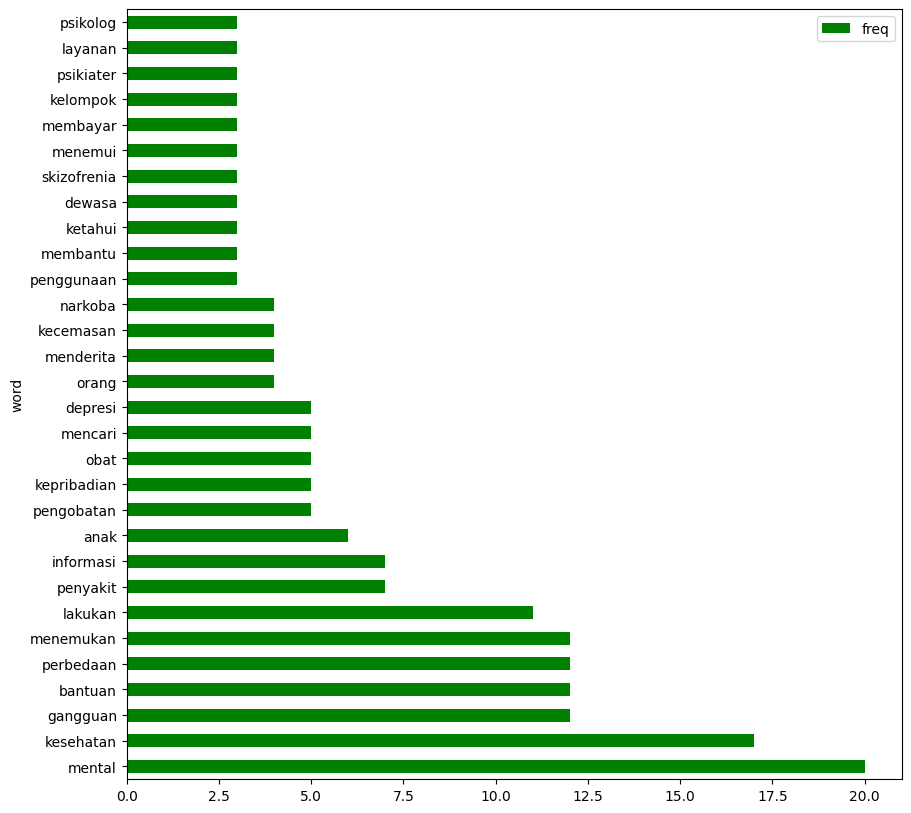

In [175]:
#Menghitung frekuensi kata-kata pada kolom "Questions"
def dictionary(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    dictionary = pd.DataFrame({'word': check.index, 'freq': check.values})
    dictionary.index = dictionary['word']
    dictionary.drop('word', axis = 1, inplace=True)
    dictionary.sort_values('freq', inplace= True, ascending= False)

    return dictionary

dictionary_clean = dictionary(faq_quest['lemma'])
dictionary_clean[:30].plot(kind = 'barh',figsize = (10,10), color='green')

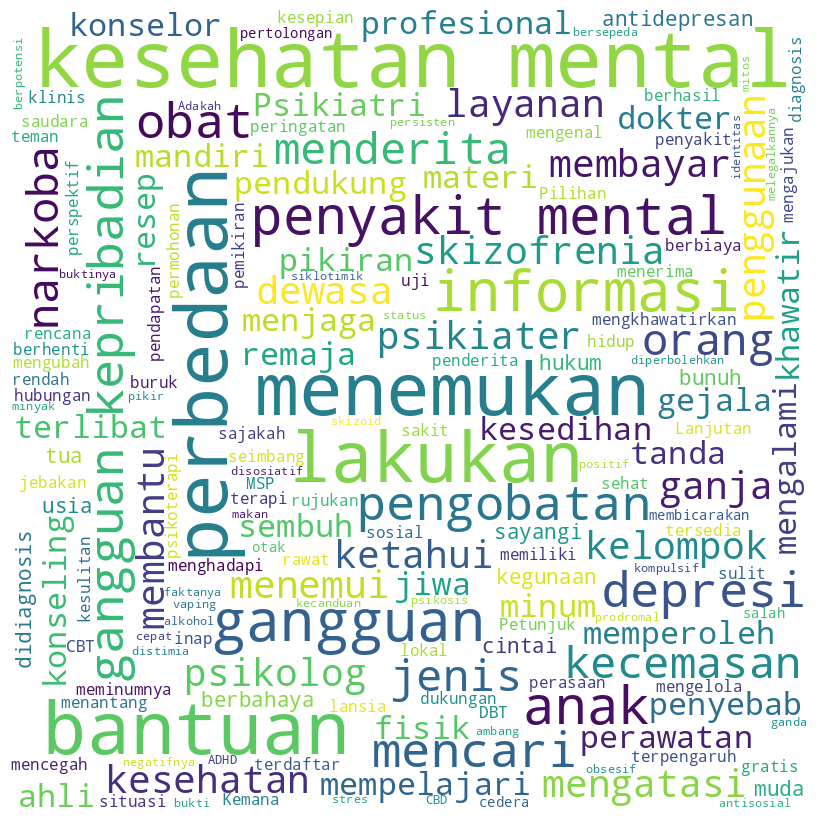

In [176]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua kata dalam kolom 'Questions' menjadi satu teks
text = ' '.join(faq_quest['Questions'])

# Membuat word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('indonesian'),
                min_font_size = 10).generate(text)

# Menampilkan word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**Berdasarkan digram batang di atas, dapat dilihat bahwa frekuensi kata yang paling sering muncul pada pertanyaan yang berkaitan dengan kesehatan mental adalah kata "mental" dengan frekuensi kata sebesar 20 dan kata "kesehatan" dengan frekuensi kata 17.**

In [177]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Gabungkan semua kata dari kolom "Question"
all_questions = ' '.join(faq_answ['lemma'])

# Tokenisasi teks menjadi kata-kata
words = word_tokenize(all_questions)

# Hitung frekuensi kata
freq_dist = FreqDist(words)

# Tampilkan frekuensi kata
print(freq_dist.most_common(10))  # Menampilkan 10 kata paling umum

[('orang', 377), ('kesehatan', 264), ('mental', 219), ('membantu', 137), ('memiliki', 135), ('perawatan', 101), ('penyakit', 98), ('gangguan', 96), ('dokter', 90), ('mengalami', 88)]


<Axes: ylabel='word'>

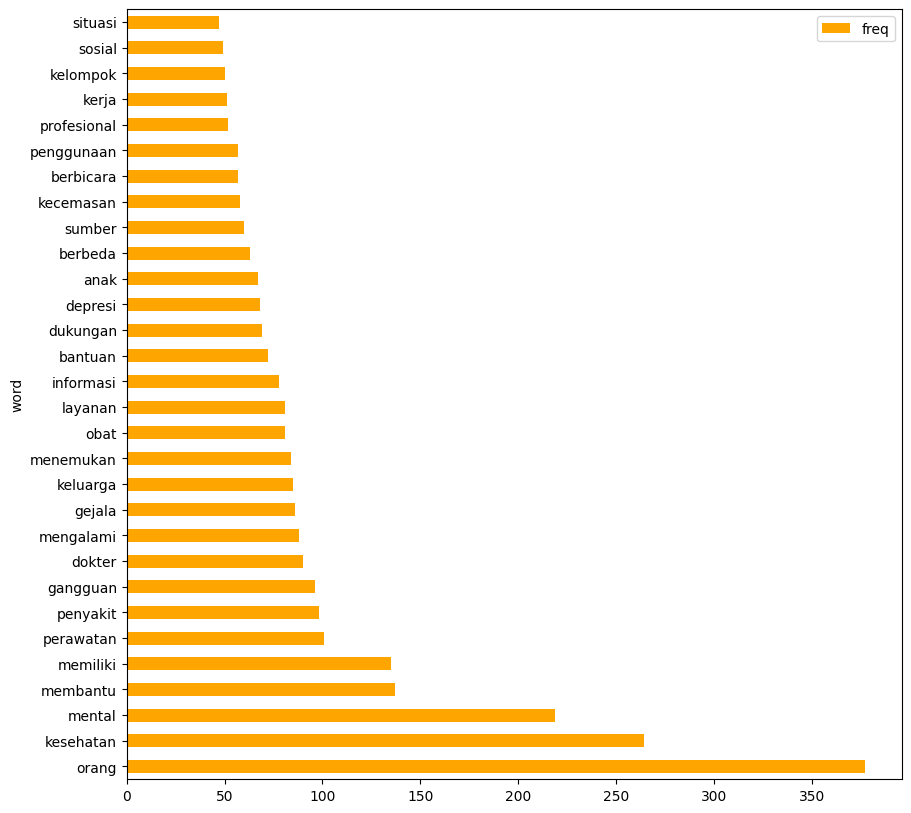

In [178]:
#Menghitung frekuensi kata-kata pada kolom "Jawaban"
def dictionary(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    dictionary = pd.DataFrame({'word': check.index, 'freq': check.values})
    dictionary.index = dictionary['word']
    dictionary.drop('word', axis = 1, inplace=True)
    dictionary.sort_values('freq', inplace= True, ascending= False)

    return dictionary

dictionary_clean = dictionary(faq_answ['lemma'])
dictionary_clean[:30].plot(kind = 'barh',figsize = (10,10),color='orange')

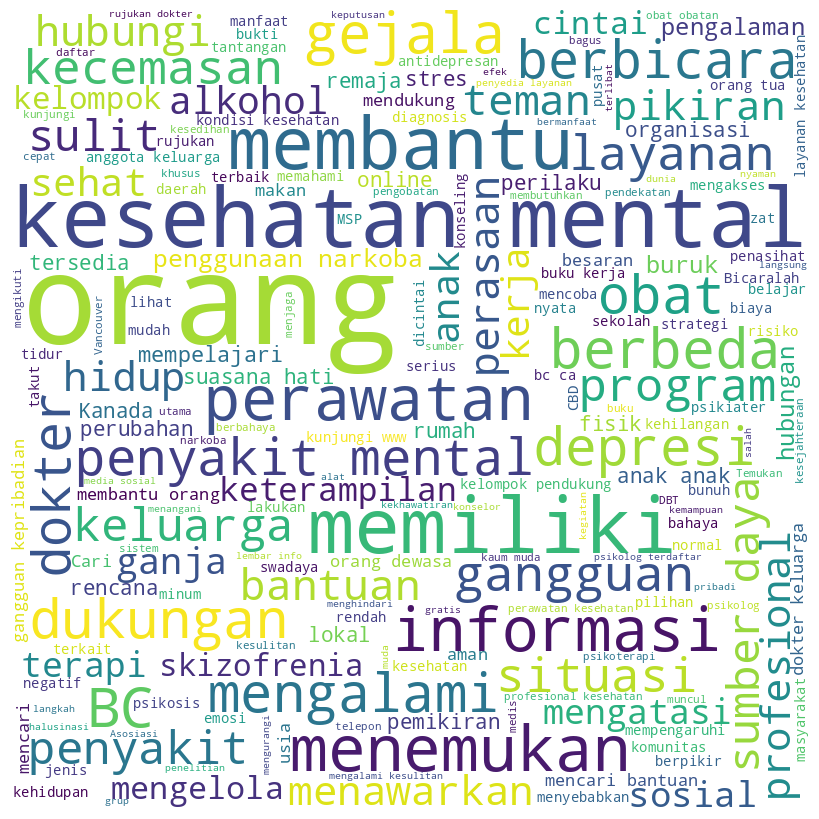

In [179]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua kata dalam kolom 'Jawaban' menjadi satu teks
text = ' '.join(faq_answ['Jawaban'])

# Membuat word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('indonesian'),
                min_font_size = 10).generate(text)

# Menampilkan word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**Berdasarkan digram batang di atas, dapat dilihat bahwa frekuensi kata yang paling sering muncul pada jawaban yang berkaitan dengan kesehatan mental adalah kata "orang" dengan frekuensi kata sebesar 377, kata "kesehatan" dengan frekuensi kata 264, dan kata "mental" dengan frekuensi kata 219.**

#**Normalisasi/Vektorisasi**

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [181]:
text = faq['Questions']
y= faq['JawabanEncode'].values

In [182]:
tfidf = TfidfVectorizer(use_idf=True, analyzer='word', stop_words='english', token_pattern=r'\b[^\d\W]+\b', ngram_range=(1,2))
X_train = tfidf.fit_transform(text)
print(X_train)

  (0, 506)	0.29766662771136054
  (0, 170)	0.3998547064187586
  (0, 187)	0.36678085172921204
  (0, 727)	0.36678085172921204
  (0, 45)	0.21621646894305466
  (0, 446)	0.21203246659316707
  (0, 504)	0.2867744503381645
  (0, 167)	0.3433145783784615
  (0, 186)	0.36678085172921204
  (0, 725)	0.1906313709496605
  (0, 36)	0.14062033956802386
  (1, 486)	0.3414532789086613
  (1, 686)	0.3414532789086613
  (1, 737)	0.3414532789086613
  (1, 639)	0.3414532789086613
  (1, 485)	0.3414532789086613
  (1, 685)	0.3414532789086613
  (1, 638)	0.3414532789086613
  (1, 506)	0.25419044573476496
  (1, 446)	0.18106372087441705
  (1, 504)	0.24488914298946848
  (1, 725)	0.16278839695698333
  (2, 509)	0.49051145702302673
  (2, 40)	0.44993895808100537
  (2, 507)	0.44993895808100537
  :	:
  (95, 18)	0.2459979689026959
  (95, 14)	0.21328947396573344
  (95, 709)	0.16874381501354382
  (95, 64)	0.13888701381380952
  (95, 577)	0.08869985000546177
  (96, 464)	0.29833042133121224
  (96, 115)	0.29833042133121224
  (96, 141)	0

**Berdasarkan output vektorisasi TF-IDF tersebut, dapat disimpulkan bahwa :**

   **(0, 506)	0.2976666277113606**

   **(0, 170)	0.39985470641875864**

   **(0, 187)	0.36678085172921204**

**kata dengan indeks 170 memiliki bobot TF-IDF tertinggi di antara ketiga kata tersebut, yang menunjukkan bahwa kata tersebut lebih spesifik atau penting dalam konteks dokumen ke-0. Sementara itu, kata dengan indeks 506 memiliki bobot yang lebih rendah, menunjukkan bahwa kata tersebut mungkin lebih umum dan lebih banyak muncul dalam korpus secara keseluruhan.**

#**Modeling**

In [183]:
lsvc = LinearSVC(random_state = 2021)
lsvc.fit(X_train, y)

LinearSVC(random_state=2021)

In [184]:
search_test = [
    "Apa yang dimaksud dengan penyakit mental?"
]

search_engine = tfidf.transform(search_test)
result = lsvc.predict(search_engine)

for question in result:
    faq_data = faq.loc[faq.isin([question]).any(axis=1)]
    print("Jawaban: ", faq_data['Jawaban'].values)

Jawaban:  ['Penyakit mental adalah kondisi kesehatan yang mengganggu pikiran, emosi, hubungan, dan fungsi seseorang. Mereka dikaitkan dengan kesusahan dan berkurangnya kapasitas untuk terlibat dalam kegiatan kehidupan sehari -hari yang biasa.\nPenyakit mental jatuh di sepanjang rangkaian keparahan: beberapa cukup ringan dan hanya mengganggu beberapa aspek kehidupan, seperti fobia tertentu. Di ujung lain spektrum terletak penyakit mental yang serius, yang mengakibatkan gangguan fungsional utama dan gangguan dengan kehidupan sehari -hari. Ini termasuk gangguan seperti depresi berat, skizofrenia, dan gangguan bipolar, dan mungkin mengharuskan orang tersebut menerima perawatan di rumah sakit.\nPenting untuk mengetahui bahwa penyakit mental adalah kondisi medis yang tidak ada hubungannya dengan karakter, kecerdasan, atau kemauan seseorang. Sama seperti diabetes adalah kelainan pankreas, penyakit mental adalah kondisi medis karena biologi otak.\nDemikian pula dengan bagaimana seseorang akan 

#**Uji/Testing**

In [185]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Inisialisasi model LinearSVC
lsvc_model = LinearSVC()

# Transformasi teks pertanyaan menjadi vektor TF-IDF
X = tfidf_vectorizer.fit_transform(faq['Questions'])  # Assuming 'Pertanyaan' is the column name for questions
lsvc_model.fit(X, faq['Jawaban'])  # Assuming 'Jawaban' is the column name for answers

# Fungsi chatbot
def chatbot():
    # List untuk menyimpan pertanyaan dan jawaban
    pertanyaan = []
    jawaban = []

    while True:
        print("Welcome to the Mental Health FAQ Chatbot!")
        print("*****************************************")
        # Meminta pengguna untuk memasukkan pertanyaan
        user_input = input("Pertanyaan : ")

        # Keluar dari loop jika pengguna mengetik 'quit'
        if user_input.lower() == 'quit':
            break

        # Transformasi input pengguna menjadi vektor TF-IDF
        user_input_vectorized = tfidf_vectorizer.transform([user_input])

        # Melakukan prediksi jawaban
        predicted_answer = lsvc_model.predict(user_input_vectorized)

        # Menampilkan jawaban
        print("Jawaban:", predicted_answer[0])

        # Menambahkan pertanyaan dan jawaban ke dalam list
        pertanyaan.append(user_input)
        jawaban.append(predicted_answer[0])

        # Menambahkan spasi
        print()

    # Membuat DataFrame dari pertanyaan dan jawaban
    df = pd.DataFrame({'Pertanyaan': pertanyaan, 'Jawaban': jawaban})

    # Menyimpan DataFrame ke dalam file CSV
    df.to_csv('chatbot_output.csv', index=False)

# Memanggil fungsi chatbot
chatbot()

Welcome to the Mental Health FAQ Chatbot!
*****************************************
Pertanyaan : Apa perbedaan kesehatan mental dan penyakit mental?
Jawaban: 'Kesehatan mental' dan 'penyakit mental' semakin banyak digunakan seolah -olah memaksudkan hal yang sama, tetapi tidak. Setiap orang memiliki kesehatan mental, sama seperti semua orang memiliki kesehatan. Seperti yang dikatakan Organisasi Kesehatan Dunia dengan terkenal, “Tidak ada kesehatan tanpa kesehatan mental.” Dalam perjalanan seumur hidup, tidak semua orang akan mengalami penyakit mental, tetapi semua orang akan berjuang atau memiliki tantangan dengan kesejahteraan mental mereka (mis., Kesehatan mental mereka) sama seperti kita semua memiliki tantangan dengan kesejahteraan fisik kita dari waktu demi waktu.
 Ketika kita berbicara tentang kesehatan mental, kita berbicara tentang kesejahteraan mental kita: emosi kita, pikiran dan perasaan kita, kemampuan kita untuk menyelesaikan masalah dan mengatasi kesulitan, koneksi sosial 

**Berdasarkan ouput jawaban yang diberikan oleh chatbot terkait pertanyaan yang diberikan oleh user yang berkaitan dengan kesehatan mental telah dijawab dengan baik oleh chatbot.**  